# Web Scraper Github

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet
import jovian

# Execute this to save new versions of the notebook
jovian.commit(project="web-scraper-github-fin")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "anvithredd3/web-scraper-github-fin" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/anvithredd3/web-scraper-github-fin


'https://jovian.ai/anvithredd3/web-scraper-github-fin'

## Project Outline:
- Website to Scrape - https://github.com/topics
- We will get topic title/page URL/description
- Each topic extracting the top 30 repositories 
- Obtain the Name,Username,Stars and Repo URL for each Repository

### Installing Requests 
- Requests makes handling HTTP requests simple 
- Requests is Open-Source HTTP Library. 

In [4]:
!pip install requests --upgrade 
import requests

     |████████████████████████████████| 62 kB 1.5 MB/s eta 0:00:011
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


### Choosing a Website
The Website to be Scraped is: https://github.com/topics

In [11]:
topics_url = "https://github.com/topics"

#### HTTP Response Status Code 
- Informational responses (100 – 199)
- Successful responses (200 – 299)
- Redirection messages (300 – 399)
- Client error responses (400 – 499)
- Server error responses (500 – 599)

In [14]:
response =  requests.get(topics_url)
response.status_code 

200

In [15]:
# This line extracts the number of charecters on the selected web page
len(response.text)

152462

When we use Python to make a request to a certain URI, a response object is returned. Now, this response object would be used to access certain aspects like content, headers and more. 

 `response.text` returns the content of the response.

In [16]:
page_contents = response.text 
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-719f1193e0c0.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-0c343b529849.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-href="htt

In [17]:
#response.text
with open('webpage.html', 'w') as f:
    f.write(page_contents)

## Installing Beautiful Soup 

Python package called Beautiful Soup is used to parse HTML and XML texts. For parsed pages, it generates a parse tree that can be used to extract HTML data for web scraping.

In [18]:
# installing beautiful soup 
!pip install beautifulsoup4 --upgrade 

     |████████████████████████████████| 128 kB 7.6 MB/s eta 0:00:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [19]:
# From the bs4 module you import the BeautifulSoup Class 
from bs4 import BeautifulSoup

In [20]:
# To parse HTML Code, go to the documentation 
doc = BeautifulSoup(page_contents, 'html.parser')

# It is a BeautifulSoup Object 
type(doc) 

bs4.BeautifulSoup

## Obtaining the Topic Titles, Topic Descriptions and Topic URLs
For the webpage at https://github.com/topics 

In [23]:
# To obtain p tags in general, but it may obtain p_tags (headings/titles) that we don't require
p_tag = doc.find_all('p')
len(p_tag)

67

In [38]:
# To get the first 3 p-tags 
p_tag[:3]

[<p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Bootstrap
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Bootstrap is an HTML, CSS, and JavaScript framework.</p>]

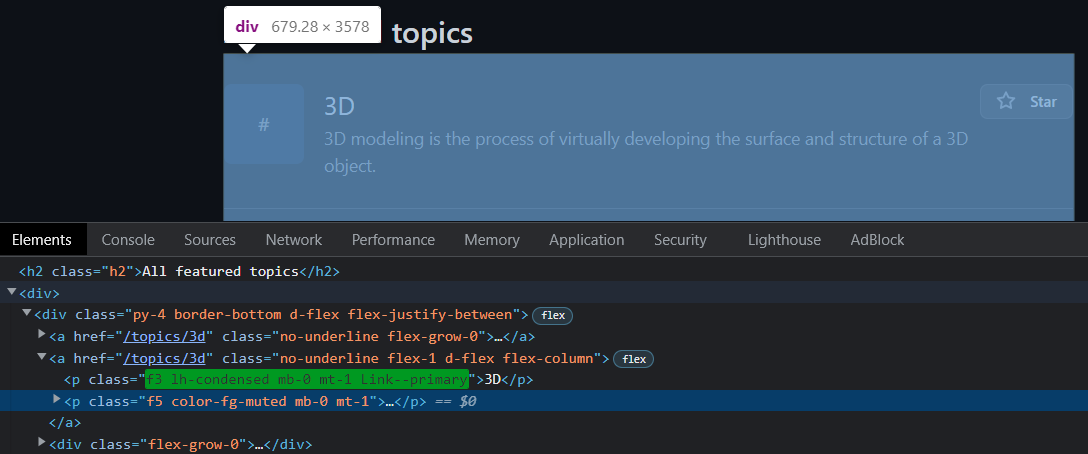
This allows us to reference the Title Name

### Extracting the Topic Titles 
`selection_class` contains the a reference to the relevant class in order to obtain the Title.
`topic_title_tags` finds all the paragraphs with respect to the selection_class.
`topic_titles` is a list that contains each topic's title

In [39]:
# <p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>

# In order to get headings in order
# To be more specific with the p_tags that are extracted from the web page 
selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"
topic_title_tags = doc.find_all('p', {'class': selection_class})
len(topic_title_tags)

30

In [43]:
topic_titles = [] 
for tag in topic_title_tags:
    topic_titles.append(tag.text)
topic_titles

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Atom',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'COVID-19',
 'C++']

### Extracting the description of each Topic


In [46]:
# <p class="f5 color-fg-muted mb-0 mt-1">

# To get the description in order using the following tag 
selection_tag_desc = "f5 color-fg-muted mb-0 mt-1"
topic_description_tags  = doc.find_all('p' , {'class': selection_tag_desc })
len(topic_description_tags)

30

In [47]:
topic_description_tags[:2]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>]

In [44]:
topic_descriptions = [] 
for desc in topic_description_tags:
    topic_descriptions.append(desc.text.strip())
topic_descriptions

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azu

### Obtaining each topic's URL 

In [34]:
#topic_title_tags0.parent
selection_tag_link = "no-underline flex-1 d-flex flex-column"
topic_link_tags = doc.find_all('a', {'class': selection_tag_link})
len(topic_link_tags)

30

In [35]:
# To get the Topic URL
topic_page_url = "https://github.com" + topic_link_tags[0]['href']
topic_page_url 

'https://github.com/topics/3d'

Creating a List called `topic_urls`, which repea

In [45]:
topic_urls = [] 
base_url = "https://github.com"
for url in topic_link_tags:
    topic_urls.append(base_url + url['href'])
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

### Importing Pandas to create a Dataframe 


In [48]:
!pip install pandas --upgrade 

     |████████████████████████████████| 12.2 MB 6.1 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3


In [49]:
import pandas as pd

#### Combining the Topic Title, Description and URL into a Dictionary

In [50]:
topics_dict = {
    'title': topic_titles,
    'description': topic_descriptions,
    'url': topic_urls
}

In [51]:
topics_df  = pd.DataFrame(topics_dict)
topics_df

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


## Getting Information from a Topic Page

In [54]:
# Requesting a response from the Topic URL
response = requests.get(topic_page_url)
topic_page_url 

'https://github.com/topics/3d'

In [55]:
response.status_code

200

In [57]:
# No of characters in the website
len(response.text)

451116

In [60]:
# Using HTML Parser from BeautifulSoup
topic_doc = BeautifulSoup(response.text, 'html.parser')

h3_selection_class = "f3 color-fg-muted text-normal lh-condensed"
repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
len(repo_tags)

20

In [61]:
# Obtaining all the information present in all the a-tags throughout the website
a_tags = repo_tags[0].find_all('a')

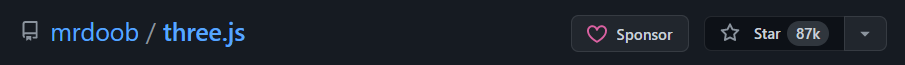

In [62]:
# Obtaining the author's name of the Repository - First
a_tags[0].text.strip()

'mrdoob'

In [64]:
# Obtaining the author's name of the Repository - Second
a_tags[1].text.strip()

'three.js'

In [67]:
# Repository link of the Author 
base_url = "https://github.com"
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


In [69]:
# Finding the number of Stars for all Repositories
star_tags = topic_doc.find_all('span', {'class' : "Counter js-social-count"})
len(star_tags)

20

In [71]:
star_tags[0].text.strip() 

'87k'

In [74]:
# This function converts the 'k' into 1000
# For instance 87k will be converted into 87000

def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1])*1000)
    return int(stars_str)

In [75]:
parse_star_count(star_tags[0].text.strip())

87000

In [77]:
def get_repo_info(h1_tag, stars_tag):
    #returns the required information of a repository 
    a_tags = h1_tag.find_all('a')
    username =  a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(stars_tag.text.strip())
    return username, repo_name, stars, repo_url 

In [78]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 87000, 'https://github.com/mrdoob/three.js')

In [84]:
# Repeating the above steps to get the Author's name, repository name, stars and repository url.
# Feeding this information into a Dictonary 

topic_repos_dict = {
    'username':[],
    'repo_name':[],
    'stars':[],
    'repo_url':[]
}

for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0]),
    topic_repos_dict['repo_name'].append(repo_info[1]),
    topic_repos_dict['stars'].append(repo_info[2]),
    topic_repos_dict['repo_url'].append(repo_info[3])

In [80]:
topic_repos_df = pd.DataFrame(topic_repos_dict)
topic_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,87000,https://github.com/mrdoob/three.js
1,libgdx,libgdx,20800,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,20400,https://github.com/pmndrs/react-three-fiber
3,BabylonJS,Babylon.js,18800,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,15200,https://github.com/ssloy/tinyrenderer
5,aframevr,aframe,14800,https://github.com/aframevr/aframe
6,lettier,3d-game-shaders-for-beginners,14000,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,12600,https://github.com/FreeCAD/FreeCAD
8,CesiumGS,cesium,9600,https://github.com/CesiumGS/cesium
9,metafizzy,zdog,9500,https://github.com/metafizzy/zdog


# Final Code 

In [94]:
 def get_topic_page(topic_url):
    #Download the page 
    response = requests.get(topic_url)
    
    # check for succuessful response 
    if response.status_code != 200:
        raise Exception("Failed to load page {}".format(topic_url))
    #Parse Using BeautifulSoup 
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

def get_repo_info(h1_tag, stars_tag):
    #returns the required information of a repository 
    a_tags = h1_tag.find_all('a')
    username =  a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(stars_tag.text.strip())
    return username, repo_name, stars, repo_url 

def get_topic_repos(topic_doc):
    
    #Get the h3 Tags containing repo title, repo URL and username
    h3_selection_class = "f3 color-fg-muted text-normal lh-condensed"
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
    
    #Get Star Tags 
    star_tags = topic_doc.find_all('span', {'class' : "Counter js-social-count"})
    
    topic_repos_dict = {
    'username':[],
    'repo_name':[],
    'stars':[],
    'repo_url':[]
    }

    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0]),
        topic_repos_dict['repo_name'].append(repo_info[1]),
        topic_repos_dict['stars'].append(repo_info[2]),
        topic_repos_dict['repo_url'].append(repo_info[3])
    return pd.DataFrame(topic_repos_dict)



In [95]:
def get_topic_titles(doc):
    #Selection of all Title Tags 
    selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    
    topic_titles = [] 
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

def get_topic_descriptions(doc):
    #Selection of all Description 
    selection_tag_desc = "f5 color-fg-muted mb-0 mt-1"
    topic_description_tags  = doc.find_all('p' , {'class': selection_tag_desc })
    
    topic_descriptions = [] 
    for desc in topic_description_tags:
        topic_descriptions.append(desc.text.strip())
    return topic_descriptions

def get_topic_urls(doc):
    #Selection of all Links 
    selection_tag_link = "no-underline flex-1 d-flex flex-column"
    topic_link_tags = doc.find_all('a', {'class': selection_tag_link})
    
    topic_urls = [] 
    base_url = "https://github.com"
    for url in topic_link_tags:
        topic_urls.append(base_url + url['href'])
    return topic_urls

def scrape_topics():
    topics_url = "https://github.com/topics"
    response =  requests.get(topics_url)
    if response.status_code != 200:
        raise Exception("Failed to load page {}".format(topic_url))

    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descriptions(doc),
        'url': get_topic_urls(doc)
    }
    topics_df  = pd.DataFrame(topics_dict)
    return topics_df


    

In [96]:
topic_repos_df = pd.DataFrame(topic_repos_dict)
topic_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,87000,https://github.com/mrdoob/three.js
1,libgdx,libgdx,20800,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,20400,https://github.com/pmndrs/react-three-fiber
3,BabylonJS,Babylon.js,18800,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,15200,https://github.com/ssloy/tinyrenderer
5,aframevr,aframe,14800,https://github.com/aframevr/aframe
6,lettier,3d-game-shaders-for-beginners,14000,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,12600,https://github.com/FreeCAD/FreeCAD
8,CesiumGS,cesium,9600,https://github.com/CesiumGS/cesium
9,metafizzy,zdog,9500,https://github.com/metafizzy/zdog


In [97]:
def get_topic_page(topic_url):
    #Download the page 
    response = requests.get(topic_url)
    
    # check for succuessful response 
    if response.status_code != 200:
        raise Exception("Failed to load page {}".format(topic_url))
    #Parse Using BeautifulSoup 
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

def get_repo_info(h1_tag, stars_tag):
    #returns the required information of a repository 
    a_tags = h1_tag.find_all('a')
    username =  a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(stars_tag.text.strip())
    return username, repo_name, stars, repo_url 

def get_topic_repos(topic_doc):
    
    #Get the h3 Tags containing repo title, repo URL and username
    h3_selection_class = "f3 color-fg-muted text-normal lh-condensed"
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
    
    #Get Star Tags 
    star_tags = topic_doc.find_all('span', {'class' : "Counter js-social-count"})
    
    topic_repos_dict = {
    'username':[],
    'repo_name':[],
    'stars':[],
    'repo_url':[]
    }

    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0]),
        topic_repos_dict['repo_name'].append(repo_info[1]),
        topic_repos_dict['stars'].append(repo_info[2]),
        topic_repos_dict['repo_url'].append(repo_info[3])
    return pd.DataFrame(topic_repos_dict)

def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping ...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path + '.csv', index = None)

In [98]:
import os 

In [99]:
def scrape_topics_repos():
    topics_df = scrape_topics()
    
    #creating a folder 
    os.makedirs('Data', exist_ok=True)
    
    for index, row in topics_df.iterrows():
        print('Scraping Top Repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'Data/{}'.format(row['title']))

In [100]:
scrape_topics_repos()

Scraping Top Repositories for "3D"
Scraping Top Repositories for "Ajax"
Scraping Top Repositories for "Algorithm"
Scraping Top Repositories for "Amp"
Scraping Top Repositories for "Android"
Scraping Top Repositories for "Angular"
Scraping Top Repositories for "Ansible"
Scraping Top Repositories for "API"
Scraping Top Repositories for "Arduino"
Scraping Top Repositories for "ASP.NET"
Scraping Top Repositories for "Atom"
Scraping Top Repositories for "Awesome Lists"
Scraping Top Repositories for "Amazon Web Services"
Scraping Top Repositories for "Azure"
Scraping Top Repositories for "Babel"
Scraping Top Repositories for "Bash"
Scraping Top Repositories for "Bitcoin"
Scraping Top Repositories for "Bootstrap"
Scraping Top Repositories for "Bot"
Scraping Top Repositories for "C"
Scraping Top Repositories for "Chrome"
Scraping Top Repositories for "Chrome extension"
Scraping Top Repositories for "Command line interface"
Scraping Top Repositories for "Clojure"
Scraping Top Repositories for "